In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-2020-ball-by-ball-data/IPL 2020 Squads.csv
/kaggle/input/ipl-2020-ball-by-ball-data/Qualifiers IPL 2008-2019.csv
/kaggle/input/ipl-2020-ball-by-ball-data/Deliveries IPL 2020.csv
/kaggle/input/ipl-2020-ball-by-ball-data/Matches IPL 2020.csv
/kaggle/input/ipl-2020-ball-by-ball-data/Matches IPL 2008-2019.csv
/kaggle/input/ipl-2020-ball-by-ball-data/Deliveries IPL 2008-2019.csv
/kaggle/input/ipl-2020-ball-by-ball-data/IPL 2020 schedule.csv


In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
match=pd.read_csv("../input/ipl-2020-ball-by-ball-data/Matches IPL 2020.csv")

In [4]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1216492,2020,Abu Dhabi,09/19/2020,MI,CSK,CSK,field,normal,0,CSK,0,5,AT Rayudu,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi
1,1216493,2020,Dubai (DSC),09/20/2020,DC,KXIP,KXIP,field,tie,0,DC,0,0,MP Stoinis,Dubai International Cricket Stadium,Anil Chaudhary,Nitin Menon,Paul Reiffel
2,1216534,2020,Dubai (DSC),09/21/2020,SRH,RCB,SRH,field,normal,0,RCB,10,0,YS Chahal,Dubai International Cricket Stadium,Anil Dandekar,Nitin Menon,Anil Chaudhary
3,1216496,2020,Sharjah,09/22/2020,RR,CSK,CSK,field,normal,0,RR,16,0,SV Samson,Sharjah Cricket Stadium,Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan
4,1216508,2020,Abu Dhabi,09/23/2020,KKR,MI,KKR,field,normal,0,MI,49,0,RG Sharma,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Sundaram Ravi,Virender Sharma


In [5]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               60 non-null     int64 
 1   season           60 non-null     int64 
 2   city             60 non-null     object
 3   date             60 non-null     object
 4   team1            60 non-null     object
 5   team2            60 non-null     object
 6   toss_winner      60 non-null     object
 7   toss_decision    60 non-null     object
 8   result           60 non-null     object
 9   dl_applied       60 non-null     int64 
 10  winner           60 non-null     object
 11  win_by_runs      60 non-null     int64 
 12  win_by_wickets   60 non-null     int64 
 13  player_of_match  60 non-null     object
 14  venue            60 non-null     object
 15  umpire1          60 non-null     object
 16  umpire2          60 non-null     object
 17  umpire3          60 non-null     obje

**MOST MAN OF THE MATCH**

In [6]:
match["player_of_match"].value_counts()

RD Gaikwad         3
AB de Villiers     3
KL Rahul           3
TA Boult           3
Anrich Nortje      2
MP Stoinis         2
BA Stokes          2
AS Yadav           2
S Dhawan           2
YS Chahal          2
SV Samson          2
Q de Kock          2
L Ferguson         1
PJ Cummins         1
AR  Patel          1
R Ashwin           1
R Tewatia          1
WP Saha            1
S Nadeem           1
RA Jadeja          1
MK Pandey          1
Ishan Kishan       1
P Shaw             1
RA Tripathi        1
SS Iyer            1
Abhishek Sharma    1
Rashid Khan        1
Shubman Gill       1
SR Watson          1
CH Gayle           1
Shivam Mavi        1
JC Buttler         1
JJ Bumrah          1
CV Varun           1
KA Pollard         1
AT Rayudu          1
CJ Jordan          1
J Bairstow         1
Mohammed Siraj     1
V Kohli            1
RG Sharma          1
KD Karthik         1
KS Williamson      1
Priyam Garg        1
Name: player_of_match, dtype: int64

In [7]:
match.groupby("winner")["player_of_match"].value_counts()

winner  player_of_match
CSK     RD Gaikwad         3
        AT Rayudu          1
        RA Jadeja          1
        SR Watson          1
DC      Anrich Nortje      2
        MP Stoinis         2
        AR  Patel          1
        P Shaw             1
        R Ashwin           1
        S Dhawan           1
        SS Iyer            1
KKR     CV Varun           1
        KD Karthik         1
        L Ferguson         1
        PJ Cummins         1
        RA Tripathi        1
        Shivam Mavi        1
        Shubman Gill       1
KXIP    KL Rahul           3
        CH Gayle           1
        CJ Jordan          1
        S Dhawan           1
MI      TA Boult           3
        AS Yadav           2
        Q de Kock          2
        Ishan Kishan       1
        JJ Bumrah          1
        KA Pollard         1
        RG Sharma          1
RCB     AB de Villiers     3
        YS Chahal          2
        Mohammed Siraj     1
        V Kohli            1
RR      BA Stokes  

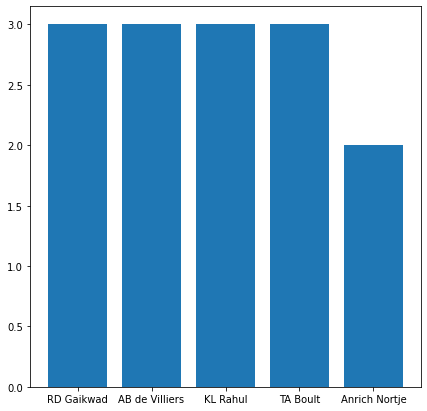

In [8]:
plt.figure(figsize=(7,7))
plt.bar(list(match["player_of_match"].value_counts()[0:5].keys()),list(match["player_of_match"].value_counts()[0:5]))
plt.show()

**MOST IPL MATCHES WIN IN 2020 SEASON WINS**

In [9]:
win=pd.DataFrame({"Winner":match["winner"]})
count_win=win.value_counts()
count_win

Winner
MI        11
DC         9
SRH        8
KKR        7
RCB        7
CSK        6
KXIP       6
RR         6
dtype: int64

Text(0.5, 1.0, 'Most wins in IPL 2020 season')

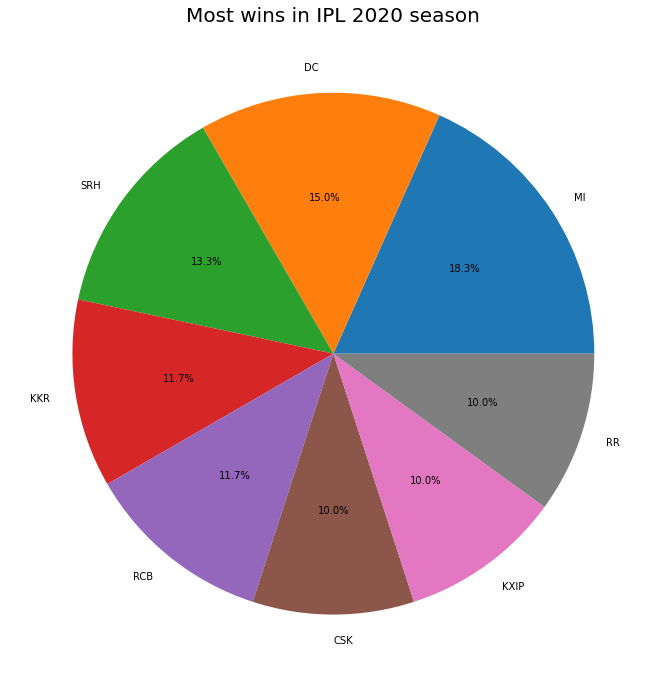

In [10]:
labels=[X[0] for X in count_win.keys()]
bar,ax=plt.subplots(figsize=(20,12))
ax=plt.pie(x=count_win,autopct="%.1f%%",labels=labels)
plt.title("Most wins in IPL 2020 season",fontsize=20)

**TOSSES WIN MATCHES**

In [11]:
team=match["toss_winner"].value_counts()
team

SRH     11
DC      10
CSK      8
MI       8
RR       7
KKR      6
RCB      6
KXIP     4
Name: toss_winner, dtype: int64

In [12]:
team_list=list(team.index)
team_list

['SRH', 'DC', 'CSK', 'MI', 'RR', 'KKR', 'RCB', 'KXIP']

In [13]:
l=[]
l1=[]

for i in team_list:
    c=0
    c1=0
    for j in range(len(match)):
        if (match.loc[j,"toss_winner"])==(match.loc[j,"winner"])==i:
            c=c+1
        if (match.loc[j,"toss_winner"])==i:
            c1=c1+1
    l.append(c1)        
    l1.append(c)
    
print(l)
print(l1)

[11, 10, 8, 8, 7, 6, 6, 4]
[6, 3, 4, 5, 2, 2, 2, 1]


In [14]:
decision_making=pd.DataFrame(columns=["team_name","toss_winner","winning_decision"])
decision_making["team_name"]=team_list
decision_making["toss_winner"]=l
decision_making["winning_decision"]=l1
decision_making

,team_name,toss_winner,winning_decision
0,SRH,11,6
1,DC,10,3
2,CSK,8,4
3,MI,8,5
4,RR,7,2
5,KKR,6,2
6,RCB,6,2
7,KXIP,4,1


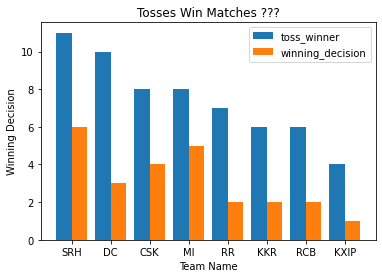

In [15]:
X_axis = np.arange(len(decision_making["team_name"]))
plt.bar(X_axis - 0.2,decision_making["toss_winner"] , 0.4, label = 'toss_winner')
plt.bar(X_axis + 0.2,decision_making["winning_decision"], 0.4, label = 'winning_decision')
plt.xticks(X_axis,decision_making["team_name"])

plt.xlabel("Team Name")
plt.ylabel("Winning Decision")
plt.title("Tosses Win Matches ???")
plt.legend()
plt.show()

In [16]:
decision_making["Percentage"]=round((decision_making["winning_decision"]/decision_making["toss_winner"])*100,2)
decision_making

,team_name,toss_winner,winning_decision,Percentage
0,SRH,11,6,54.55
1,DC,10,3,30.00
2,CSK,8,4,50.00
3,MI,8,5,62.50
4,RR,7,2,28.57
5,KKR,6,2,33.33
6,RCB,6,2,33.33
7,KXIP,4,1,25.00


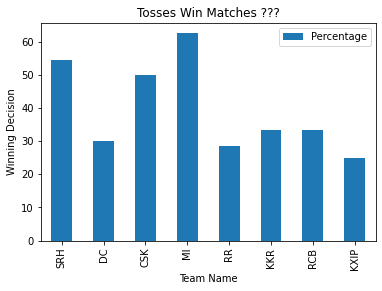

In [17]:
decision_making["Percentage"].plot(kind='bar')
positions=(0,1,2,3,4,5,6,7)
labels = tuple(decision_making["team_name"])
plt.xticks(positions, labels)
plt.xlabel("Team Name")
plt.ylabel("Winning Decision")
plt.title("Tosses Win Matches ???")
plt.legend()
plt.show()

**TOSS DECISION BAT/FIELD**

In [18]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1216492,2020,Abu Dhabi,09/19/2020,MI,CSK,CSK,field,normal,0,CSK,0,5,AT Rayudu,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi
1,1216493,2020,Dubai (DSC),09/20/2020,DC,KXIP,KXIP,field,tie,0,DC,0,0,MP Stoinis,Dubai International Cricket Stadium,Anil Chaudhary,Nitin Menon,Paul Reiffel
2,1216534,2020,Dubai (DSC),09/21/2020,SRH,RCB,SRH,field,normal,0,RCB,10,0,YS Chahal,Dubai International Cricket Stadium,Anil Dandekar,Nitin Menon,Anil Chaudhary
3,1216496,2020,Sharjah,09/22/2020,RR,CSK,CSK,field,normal,0,RR,16,0,SV Samson,Sharjah Cricket Stadium,Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan
4,1216508,2020,Abu Dhabi,09/23/2020,KKR,MI,KKR,field,normal,0,MI,49,0,RG Sharma,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Sundaram Ravi,Virender Sharma


In [19]:
l=[]
l1=[]

for i in team_list:
    c=0
    c1=0
    for j in range(len(match)):
        if ((match.loc[j,"toss_decision"])=="field") and ((match.loc[j,"toss_winner"])==i):
            c=c+1
        if ((match.loc[j,"toss_decision"])=="bat") and ((match.loc[j,"toss_winner"])==i):
            c1=c1+1
    l.append(c1)        
    l1.append(c)
    
print(l)
print(l1)

[4, 5, 3, 4, 2, 4, 4, 1]
[7, 5, 5, 4, 5, 2, 2, 3]


In [20]:
toss_decision=pd.DataFrame(columns=["team_name","toss_decision_bat","toss_decision_field"])
toss_decision["team_name"]=team_list
toss_decision["toss_decision_bat"]=l
toss_decision["toss_decision_field"]=l1
toss_decision

,team_name,toss_decision_bat,toss_decision_field
0,SRH,4,7
1,DC,5,5
2,CSK,3,5
3,MI,4,4
4,RR,2,5
5,KKR,4,2
6,RCB,4,2
7,KXIP,1,3


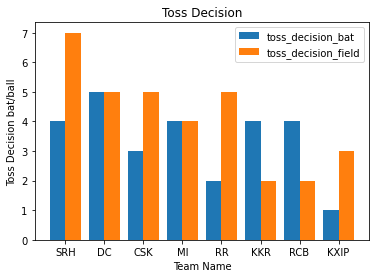

In [21]:
X_axis = np.arange(len(toss_decision["team_name"]))
plt.bar(X_axis - 0.2,toss_decision["toss_decision_bat"] , 0.4, label = 'toss_decision_bat')
plt.bar(X_axis + 0.2,toss_decision["toss_decision_field"], 0.4, label = 'toss_decision_field')
plt.xticks(X_axis,toss_decision["team_name"])

plt.xlabel("Team Name")
plt.ylabel("Toss Decision bat/ball")
plt.title("Toss Decision")
plt.legend()
plt.show()

**FIELD/BAT TOSS DECISION**

In [22]:
l=[]
l1=[]

for i in team_list:
    c=0
    c1=0
    for j in range(len(match)):
        if ((match.loc[j,"toss_decision"])=="field") and ((match.loc[j,"toss_winner"])==i) and ((match.loc[j,"winner"])==i):
            c=c+1
        if ((match.loc[j,"toss_decision"])=="bat") and ((match.loc[j,"toss_winner"])==i) and ((match.loc[j,"winner"])==i):
            c1=c1+1
    l.append(c1)        
    l1.append(c)
    
print(l)
print(l1)

[2, 2, 1, 2, 0, 2, 2, 0]
[4, 1, 3, 3, 2, 0, 0, 1]


In [23]:
winner_toss_decision=pd.DataFrame(columns=["team_name","toss_decision_bat_winner","toss_decision_field_winner"])
winner_toss_decision["team_name"]=team_list
winner_toss_decision["toss_decision_bat_winner"]=l
winner_toss_decision["toss_decision_field_winner"]=l1
winner_toss_decision

,team_name,toss_decision_bat_winner,toss_decision_field_winner
0,SRH,2,4
1,DC,2,1
2,CSK,1,3
3,MI,2,3
4,RR,0,2
5,KKR,2,0
6,RCB,2,0
7,KXIP,0,1


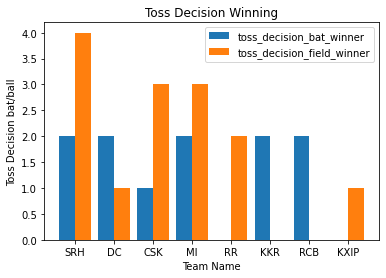

In [24]:
X_axis = np.arange(len(toss_decision["team_name"]))
plt.bar(X_axis - 0.2,winner_toss_decision["toss_decision_bat_winner"] , 0.4, label = 'toss_decision_bat_winner')
plt.bar(X_axis + 0.2,winner_toss_decision["toss_decision_field_winner"], 0.4, label = 'toss_decision_field_winner')
plt.xticks(X_axis,toss_decision["team_name"])

plt.xlabel("Team Name")
plt.ylabel("Toss Decision bat/ball")
plt.title("Toss Decision Winning")
plt.legend()
plt.show()

**FAMOUS VENUE**

In [25]:
match["venue"].value_counts().index

Index(['Dubai International Cricket Stadium',
       'Sheikh Zayed Stadium, Abu Dhabi', 'Sharjah Cricket Stadium'],
      dtype='object')

Text(0, 0.5, 'Venue')

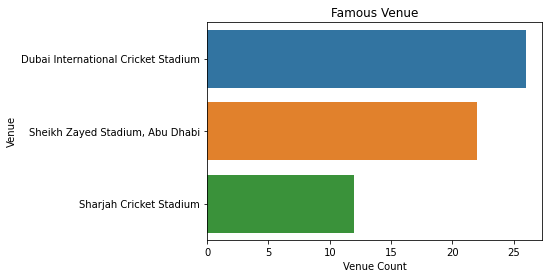

In [26]:
sns.barplot(x=match["venue"].value_counts().values,
           y=match["venue"].value_counts().index,
            data=match
           )
plt.title("Famous Venue")
plt.xlabel("Venue Count")
plt.ylabel("Venue")

In [27]:
match["venue"].unique()

array(['Sheikh Zayed Stadium, Abu Dhabi',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium'],
      dtype=object)

In [28]:
dubai=match[match["venue"]=="Dubai International Cricket Stadium"]
dubai.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,1216493,2020,Dubai (DSC),09/20/2020,DC,KXIP,KXIP,field,tie,0,DC,0,0,MP Stoinis,Dubai International Cricket Stadium,Anil Chaudhary,Nitin Menon,Paul Reiffel
2,1216534,2020,Dubai (DSC),09/21/2020,SRH,RCB,SRH,field,normal,0,RCB,10,0,YS Chahal,Dubai International Cricket Stadium,Anil Dandekar,Nitin Menon,Anil Chaudhary
5,1216510,2020,Dubai (DSC),09/24/2020,KXIP,RCB,RCB,field,normal,0,KXIP,97,0,KL Rahul,Dubai International Cricket Stadium,Anil Chaudhary,Paul Reiffel,Nitin Menon
6,1216539,2020,Dubai (DSC),09/25/2020,CSK,DC,CSK,field,normal,0,DC,44,0,P Shaw,Dubai International Cricket Stadium,KN Ananthapadmanabhan,Richard Illingworth,Krishnamachari Srinivasan
9,1216547,2020,Dubai (DSC),09/28/2020,RCB,MI,MI,field,tie,0,RCB,0,0,AB de Villiers,Dubai International Cricket Stadium,Nitin Menon,Paul Reiffel,Anil Chaudhary


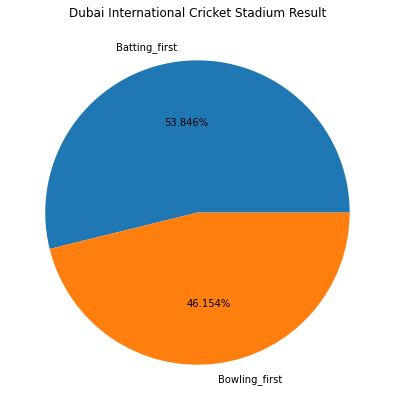

In [29]:
plt.figure(figsize=(7,7))
dubai_win_by_runs=dubai[dubai["win_by_runs"]>0]
slices=[len(dubai_win_by_runs),len(dubai)-len(dubai_win_by_runs)]
labels=["Batting_first","Bowling_first"]
plt.pie(slices,labels=labels,autopct="%2.3f%%")
plt.title("Dubai International Cricket Stadium Result")
plt.show()

**TOP 5 UMPIRE_1**

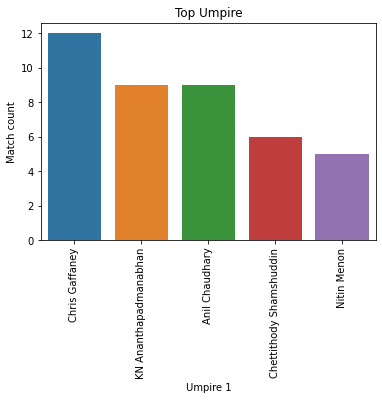

In [30]:
sns.barplot(x=match["umpire1"].value_counts().head().index,
           y=match["umpire1"].value_counts().head().values,
            data=match
           )
plt.xticks(rotation=90)
plt.title("Top Umpire")
plt.xlabel("Umpire 1")
plt.ylabel("Match count")
plt.show()

**BATTING FIRST**

In [31]:
batting_first=match[match["win_by_runs"]!=0]
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,1216534,2020,Dubai (DSC),09/21/2020,SRH,RCB,SRH,field,normal,0,RCB,10,0,YS Chahal,Dubai International Cricket Stadium,Anil Dandekar,Nitin Menon,Anil Chaudhary
3,1216496,2020,Sharjah,09/22/2020,RR,CSK,CSK,field,normal,0,RR,16,0,SV Samson,Sharjah Cricket Stadium,Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan
4,1216508,2020,Abu Dhabi,09/23/2020,KKR,MI,KKR,field,normal,0,MI,49,0,RG Sharma,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Sundaram Ravi,Virender Sharma
5,1216510,2020,Dubai (DSC),09/24/2020,KXIP,RCB,RCB,field,normal,0,KXIP,97,0,KL Rahul,Dubai International Cricket Stadium,Anil Chaudhary,Paul Reiffel,Nitin Menon
6,1216539,2020,Dubai (DSC),09/25/2020,CSK,DC,CSK,field,normal,0,DC,44,0,P Shaw,Dubai International Cricket Stadium,KN Ananthapadmanabhan,Richard Illingworth,Krishnamachari Srinivasan


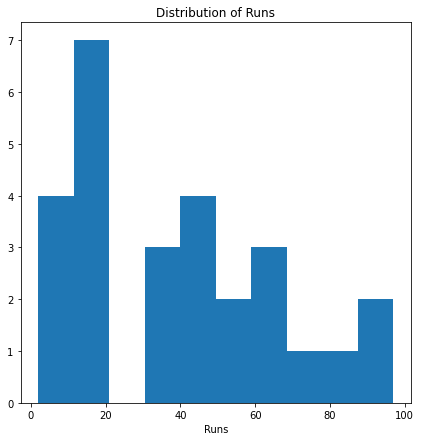

In [32]:
plt.figure(figsize=(7,7))
plt.hist(batting_first["win_by_runs"])
plt.title("Distribution of Runs")
plt.xlabel("Runs")
plt.show()

In [33]:
batting_first["winner"].value_counts()

DC      6
KKR     5
MI      5
SRH     4
RCB     3
KXIP    2
CSK     1
RR      1
Name: winner, dtype: int64

**TOP 3 TEAMS WINNING BATTING FIRST**

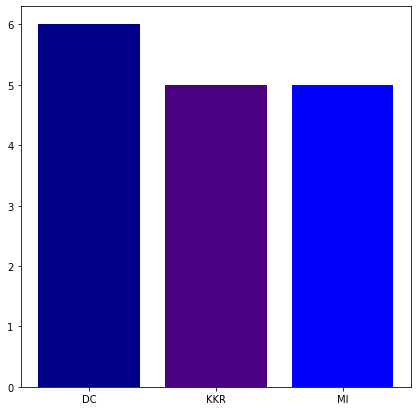

In [34]:
plt.figure(figsize=(7,7))
plt.bar(list(batting_first["winner"].value_counts()[0:3].keys()),list(batting_first["winner"].value_counts()[0:3]),color=["darkblue","indigo","blue"])
plt.show()

**BATTING FIRST PIE CHART ALL TEAMS**

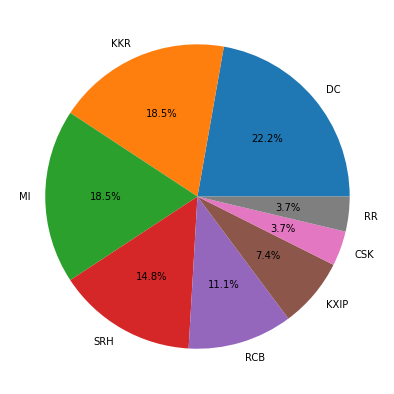

In [35]:
plt.figure(figsize=(7,7))
plt.pie(list(batting_first["winner"].value_counts()),labels=list(batting_first["winner"].value_counts().keys()),autopct="%.1f%%")
plt.show()

**BATTING SECOND**

In [36]:
batting_second=match[match["win_by_wickets"]!=0]
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1216492,2020,Abu Dhabi,09/19/2020,MI,CSK,CSK,field,normal,0,CSK,0,5,AT Rayudu,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi
7,1216545,2020,Abu Dhabi,09/26/2020,KKR,SRH,SRH,bat,normal,0,KKR,0,7,Shubman Gill,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi
8,1216527,2020,Sharjah,09/27/2020,RR,KXIP,RR,field,normal,0,RR,0,4,SV Samson,Sharjah Cricket Stadium,Richard Illingworth,Krishnamachari Srinivasan,Chettithody Shamshuddin
14,1216514,2020,Abu Dhabi,10-03-20,RCB,RR,RR,bat,normal,0,RCB,0,8,YS Chahal,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Sundaram Ravi,Pashchim Pathak
17,1216513,2020,Dubai (DSC),10-04-20,KXIP,CSK,KXIP,bat,normal,0,CSK,0,10,SR Watson,Dubai International Cricket Stadium,Anil Dandekar,Nitin Menon,Paul Reiffel


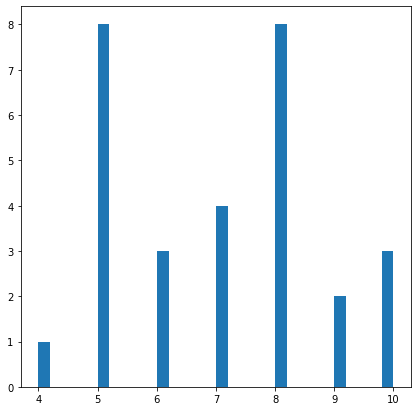

In [37]:
plt.figure(figsize=(7,7))
plt.hist(batting_second["win_by_wickets"],bins=30)
plt.show()

In [38]:
batting_second["winner"].value_counts()

MI      6
CSK     5
RR      5
SRH     4
KXIP    3
RCB     3
DC      2
KKR     1
Name: winner, dtype: int64

In [39]:
batting_second["winner"].value_counts()[0:3].keys()

Index(['MI', 'CSK', 'RR'], dtype='object')

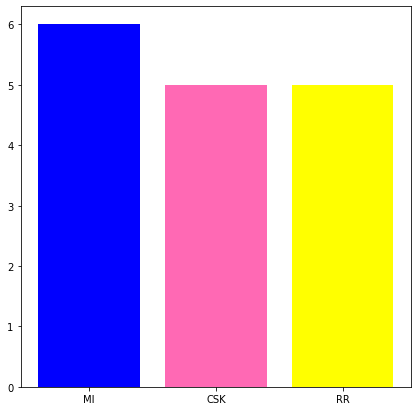

In [40]:
plt.figure(figsize=(7,7))
plt.bar(list(batting_second["winner"].value_counts()[0:3].keys()),list(batting_second["winner"].value_counts()[0:3]),color=["blue","hotpink","yellow"])
plt.show()

**DELIVERIES**

In [41]:
deliveries=pd.read_csv("../input/ipl-2020-ball-by-ball-data/Deliveries IPL 2020.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1216492,1,MI,CSK,1,1,RG Sharma,Q de Kock,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1216492,1,MI,CSK,1,2,RG Sharma,Q de Kock,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2,1216492,1,MI,CSK,1,3,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
3,1216492,1,MI,CSK,1,4,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4,1216492,1,MI,CSK,1,5,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [42]:
deliveries.isnull().sum()

match_id                0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batsman                 0
non_striker             6
bowler                  0
is_super_over           0
wide_runs               0
bye_runs                0
legbye_runs             0
noball_runs             0
penalty_runs            0
batsman_runs            0
extra_runs              0
total_runs              0
player_dismissed    14113
dismissal_kind      14113
fielder             14276
dtype: int64

In [43]:
deliveries.shape

(14326, 21)

In [44]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

**MOST DELIVERY FACED**

In [45]:
deliveries["batsman"].value_counts().head()

KL Rahul     551
DA Warner    433
S Dhawan     425
SS Iyer      421
V Kohli      393
Name: batsman, dtype: int64

**BATSMAN WHO FACED MOST DELIVERY BY MI BOWLERS**

In [46]:
mi_deliveries=deliveries[deliveries["bowling_team"]=="MI"]
mi_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
116,1216492,2,CSK,MI,1,1,M Vijay,SR Watson,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
117,1216492,2,CSK,MI,1,2,SR Watson,M Vijay,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
118,1216492,2,CSK,MI,1,3,SR Watson,M Vijay,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
119,1216492,2,CSK,MI,1,4,SR Watson,M Vijay,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
120,1216492,2,CSK,MI,1,5,SR Watson,M Vijay,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [47]:
mi_deliveries["batsman"].value_counts().head()

SS Iyer       121
DA Warner     108
D Padikkal     86
KL Rahul       76
RR Pant        73
Name: batsman, dtype: int64

**MOST DELIVERY BOWLED**

In [48]:
deliveries["bowler"].value_counts().head()

Rashid Khan      404
T Natarajan      403
K Rabada         392
Anrich Nortje    368
JJ Bumrah        367
Name: bowler, dtype: int64

**MOST DELIVERY BOWLED BY MI BOWLERS**

In [49]:
mi_deliveries["bowler"].value_counts().head()

JJ Bumrah          367
TA Boult           336
RD Chahar          310
JL Pattinson       214
NM Coulter-Nile    162
Name: bowler, dtype: int64

In [50]:
first_match=deliveries[deliveries["match_id"]==1216492]
first_match.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1216492,1,MI,CSK,1,1,RG Sharma,Q de Kock,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1216492,1,MI,CSK,1,2,RG Sharma,Q de Kock,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2,1216492,1,MI,CSK,1,3,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
3,1216492,1,MI,CSK,1,4,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4,1216492,1,MI,CSK,1,5,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [51]:
first_match.shape

(234, 21)

In [52]:
mi_batting=deliveries[deliveries["batting_team"]=="MI"]
mi_batting.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1216492,1,MI,CSK,1,1,RG Sharma,Q de Kock,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1216492,1,MI,CSK,1,2,RG Sharma,Q de Kock,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2,1216492,1,MI,CSK,1,3,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
3,1216492,1,MI,CSK,1,4,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4,1216492,1,MI,CSK,1,5,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [53]:
csk_batting=deliveries[deliveries["batting_team"]=="CSK"]
csk_batting.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
116,1216492,2,CSK,MI,1,1,M Vijay,SR Watson,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
117,1216492,2,CSK,MI,1,2,SR Watson,M Vijay,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
118,1216492,2,CSK,MI,1,3,SR Watson,M Vijay,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
119,1216492,2,CSK,MI,1,4,SR Watson,M Vijay,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
120,1216492,2,CSK,MI,1,5,SR Watson,M Vijay,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [54]:
mi_batting_fm=mi_batting[mi_batting["match_id"]==1216492]
mi_batting_fm.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1216492,1,MI,CSK,1,1,RG Sharma,Q de Kock,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1216492,1,MI,CSK,1,2,RG Sharma,Q de Kock,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2,1216492,1,MI,CSK,1,3,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
3,1216492,1,MI,CSK,1,4,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4,1216492,1,MI,CSK,1,5,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [55]:
csk_batting_fm=csk_batting[csk_batting["match_id"]==1216492]
csk_batting_fm.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
116,1216492,2,CSK,MI,1,1,M Vijay,SR Watson,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
117,1216492,2,CSK,MI,1,2,SR Watson,M Vijay,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
118,1216492,2,CSK,MI,1,3,SR Watson,M Vijay,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
119,1216492,2,CSK,MI,1,4,SR Watson,M Vijay,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
120,1216492,2,CSK,MI,1,5,SR Watson,M Vijay,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [56]:
mi_batting_fm.shape

(116, 21)

In [57]:
mi_batting_fm["total_runs"].sum()

162

In [58]:
csk_batting_fm["total_runs"].sum()

166

In [59]:
mi_batting_fm.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [60]:
runs_per_over=mi_batting_fm.groupby("over")["total_runs"].sum()

In [61]:
runs_per_over_csk=csk_batting_fm.groupby("over")["total_runs"].sum()

In [62]:
runs_per_over_fm=pd.DataFrame()

In [63]:
csk_runs_per_over_fm=pd.DataFrame()

In [64]:
runs_per_over_fm["over"]=runs_per_over.index
runs_per_over_fm["runs"]=runs_per_over.to_list()
runs_per_over_fm

,over,runs
0,1,12
1,2,7
2,3,8
3,4,18
4,5,3
5,6,3
6,7,9
7,8,8
8,9,15
9,10,3


In [65]:
csk_runs_per_over_fm["over"]=runs_per_over_csk.index
csk_runs_per_over_fm["runs"]=runs_per_over_csk.to_list()
csk_runs_per_over_fm

,over,runs
0,1,5
1,2,1
2,3,6
3,4,7
4,5,4
5,6,14
6,7,6
7,8,8
8,9,7
9,10,12


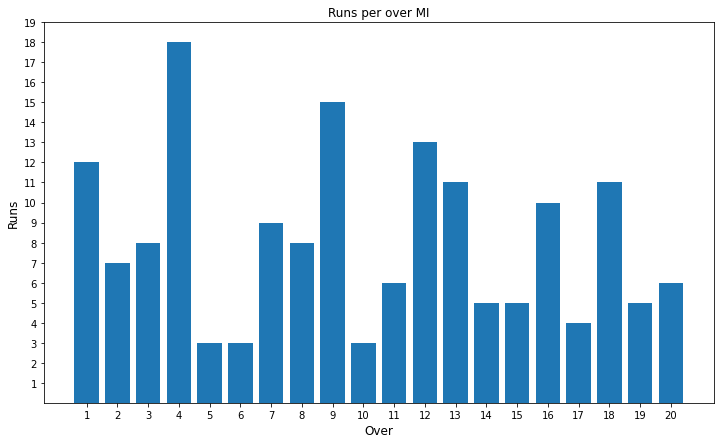

In [66]:
fig = plt.figure(figsize =(12, 7))
plt.ylabel('Runs',fontsize=12)
plt.xlabel('Over',fontsize=12)
plt.title('Runs per over MI',fontsize=12)
plt.bar(runs_per_over_fm["over"],runs_per_over_fm["runs"])
plt.yticks(range(1,20))
plt.xticks(range(1,21))
plt.show()

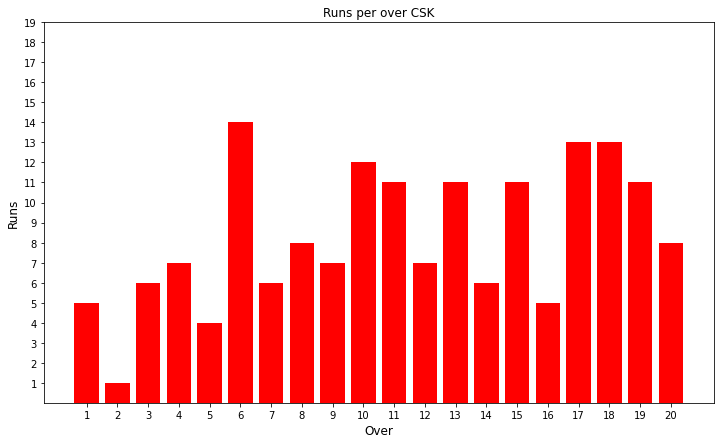

In [67]:
fig = plt.figure(figsize =(12, 7))
plt.ylabel('Runs',fontsize=12)
plt.xlabel('Over',fontsize=12)
plt.title('Runs per over CSK',fontsize=12)
plt.bar(csk_runs_per_over_fm["over"],csk_runs_per_over_fm["runs"],color=["red"])
plt.yticks(range(1,20))
plt.xticks(range(1,21))
plt.show()

In [68]:
l=[]
c=0
for i in runs_per_over_fm["runs"]:
    c=c+i
    l.append(c)
print(l)

[12, 19, 27, 45, 48, 51, 60, 68, 83, 86, 92, 105, 116, 121, 126, 136, 140, 151, 156, 162]


In [69]:
l1=[]
c1=0
for i in csk_runs_per_over_fm["runs"]:
    c1=c1+i
    l1.append(c1)
print(l1)

[5, 6, 12, 19, 23, 37, 43, 51, 58, 70, 81, 88, 99, 105, 116, 121, 134, 147, 158, 166]


In [70]:
runs_progress=pd.DataFrame()
runs_progress["over"]=runs_per_over_fm["over"]
runs_progress["runs"]=l

In [71]:
runs_progress_csk=pd.DataFrame()
runs_progress_csk["over"]=csk_runs_per_over_fm["over"]
runs_progress_csk["runs"]=l1

In [72]:
runs_progress.head()

,over,runs
0,1,12
1,2,19
2,3,27
3,4,45
4,5,48


In [73]:
runs_progress_csk.head()

,over,runs
0,1,5
1,2,6
2,3,12
3,4,19
4,5,23


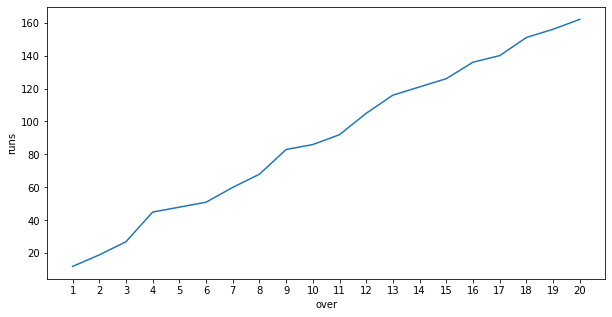

In [74]:
plt.figure(figsize=[10,5])
sns.lineplot(data=runs_progress, x="over", y="runs")
plt.xticks(range(1,21))
plt.show()


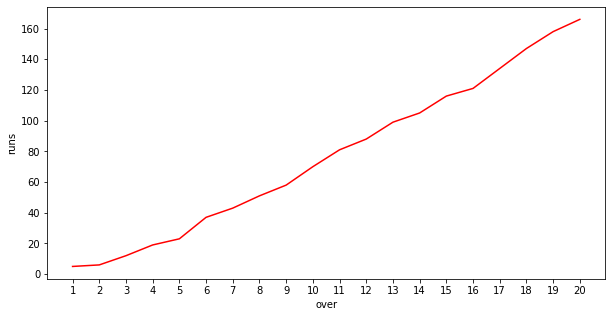

In [75]:
plt.figure(figsize=[10,5])
sns.lineplot(data=runs_progress_csk, x="over", y="runs",color="red")
plt.xticks(range(1,21))
plt.show()

In [76]:
complete_run_progress=pd.DataFrame()
complete_run_progress["over"]=csk_runs_per_over_fm["over"]
complete_run_progress["mi_runs"]=runs_progress["runs"]
complete_run_progress["csk_runs"]=runs_progress_csk["runs"]
complete_run_progress.head()

,over,mi_runs,csk_runs
0,1,12,5
1,2,19,6
2,3,27,12
3,4,45,19
4,5,48,23


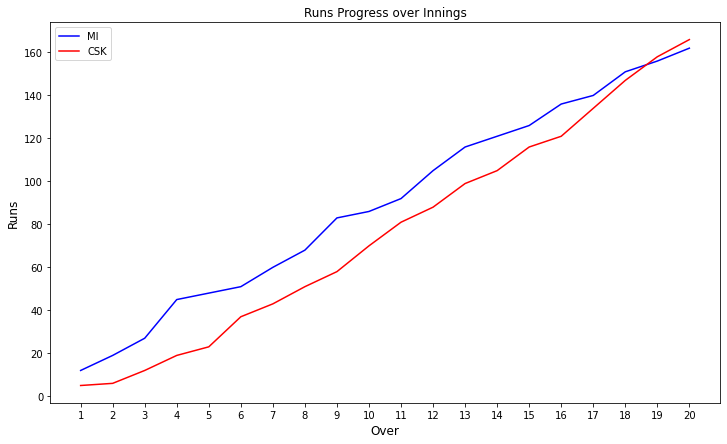

In [77]:
plt.figure(figsize=(12,7))
plt.ylabel('Runs',fontsize=12)
plt.xlabel('Over',fontsize=12)
sns.lineplot(data=complete_run_progress, x="over", y="mi_runs",color="blue",label="MI")
sns.lineplot(data=complete_run_progress, x="over", y="csk_runs",color="red",label="CSK")
plt.title('Runs Progress over Innings',fontsize=12)
plt.xticks(range(1,21))
plt.show()